<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение графиков</a></span></li></ul></div>

# Аналитика в авиакомпании

В нашем распоряжении данные с количеством рейсов по моделям самолетов в сентябре 2018 и среднем количестве рейсов в день по городам России за август 2018.

Изучим данные, построим по ним графики и сделаем выводы.

## Изучение данных

In [1]:
# Импортируем библиотеки, открываем файлы с данными:

import pandas as pd
import sys   
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display

models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

In [2]:
# Изучаем данные из 1-й таблицы:

models.info()
display(models.head())
display(models.describe())
display(models.isna().sum())
display(models.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


model             0
flights_amount    0
dtype: int64

0

In [3]:
# В 1-й таблице всего 8 строк, выведем все:

display(models.head(8))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# Изучаем данные из 2-й таблицы:

cities.info()
display(cities.head())
display(cities.describe())
display(cities.isna().sum())
display(cities.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


city               0
average_flights    0
dtype: int64

0

**Выводы:**
- В таблице 1 содержатся данные о модели самолетов и количестве рейсов для каждой модели самолетов в сентябре 2018 года. В таблице 8 строк, пропусков нет, дубликатов нет, типы данных корректны (object для названия моделей самолетов и int64 для количества рейсов).
- В таблице 2 содержатся данные о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года. В таблице 101 строка, пропусков нет, дубликатов нет, типы данных корректны (object для названия города и float64 для среднего количества рейсов).

## Топ-10 городов по количеству рейсов

In [5]:
# Выведем топ-10 городов по среднему количеству рейсов:

top10_cities = cities.sort_values(by=['average_flights'], ascending=False).head(10)
display(top10_cities)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## Построение графиков

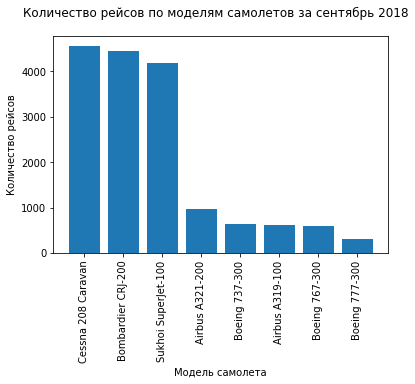

In [6]:
# Построим столбчатую диаграмму распределения моделей самолетов и количества рейсов по убыванию:

models_sorted = models.sort_values('flights_amount', ascending = False)
plt.bar(models_sorted['model'], models_sorted['flights_amount'])
plt.suptitle('Количество рейсов по моделям самолетов за сентябрь 2018')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=90);

На основании построенного графика можно сделать выводы:

- Чем меньше самолет, тем больше рейсов он осуществляет, так как используется для перелетов на более короткие расстояния и, соответственно, может осуществить больше рейсов. Можно выделить три группы самолетов:
    1. На первом месте по количеству рейсов идут рейсы на самолетах Cessna 208 Caravan. Это самолет малой авиации, предназначенный для транспортировки небольшого количества людей (до 13 чел), дальность полета около 1500 км (данные из открытых источников).
    2. На втором и третьем месте по количеству рейсов - самолеты Bombardier CRJ-200 (вместимость около 50 чел., дальность полета около 3000 км) и Sukhoi SuperJet-100 (вместимость 100 чел., дальность полета 3000 км или 4500 км в зависимости от модификации)
    3. С 4 по 8 место самолеты производителей Boeing и Airbus с вместимостью 150-450 чел и дальностью полета 4000-11000 км.

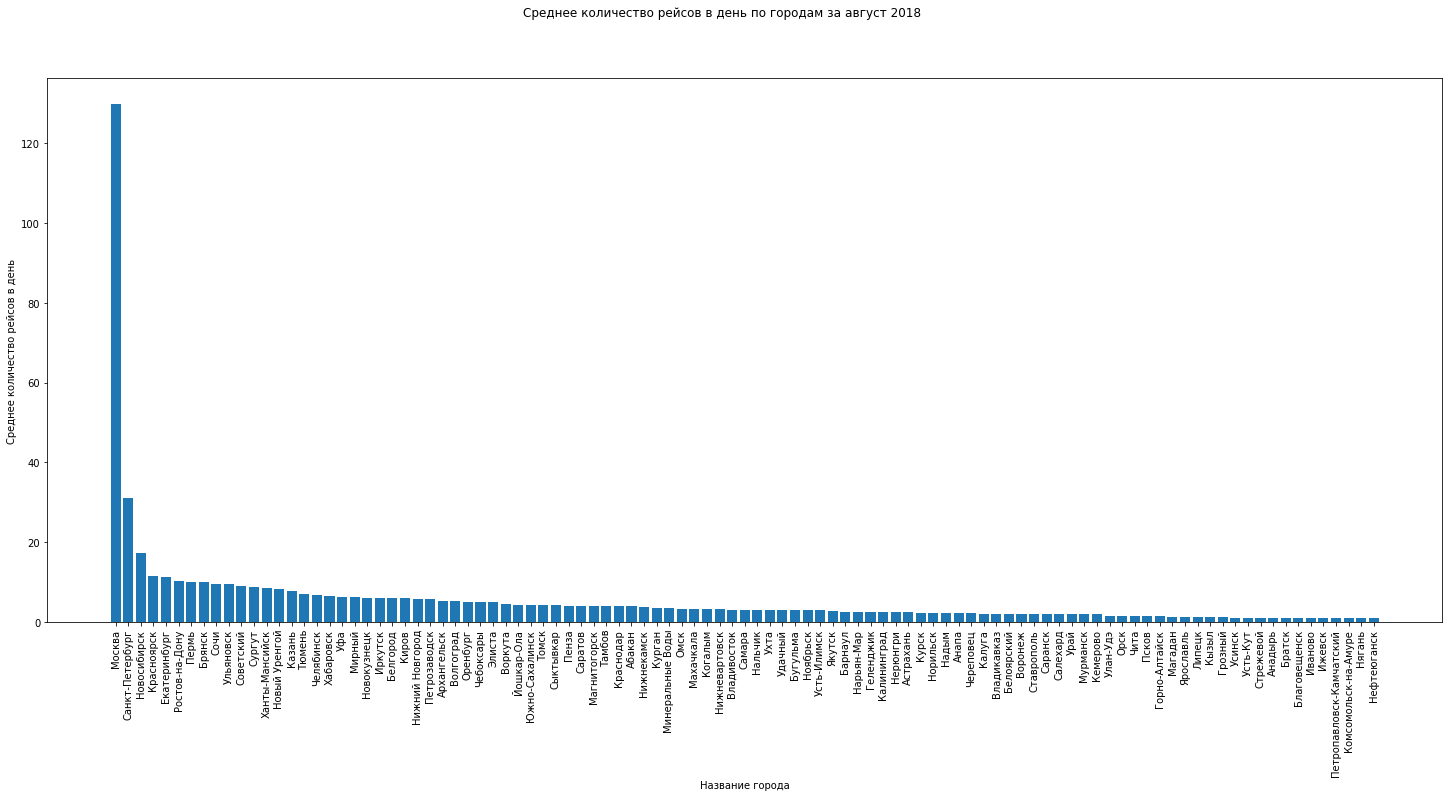

In [7]:
# Построим столбчатую диаграмму распределения городов и среднего количества рейсов по убыванию
# (так как в таблице большее количество значений, размер графика обозначим вручную):

cities_sorted = cities.sort_values('average_flights', ascending = False)
plt.figure(figsize=(25, 10))
plt.bar(cities_sorted['city'], cities_sorted['average_flights'])

plt.suptitle('Среднее количество рейсов в день по городам за август 2018')
plt.xlabel('Название города')
plt.ylabel('Среднее количество рейсов в день')

plt.xticks(rotation=90);

На графике виден колоссальный отрыв среднего количества рейсов, прибывающих в Москву от остальных городов. Данный результат закономерен, так как Москва является крупнейшим городом России, главным пересадочным узлов всех авиакомпаний России, также через Москву осуществляется большинство рейсов за границу.

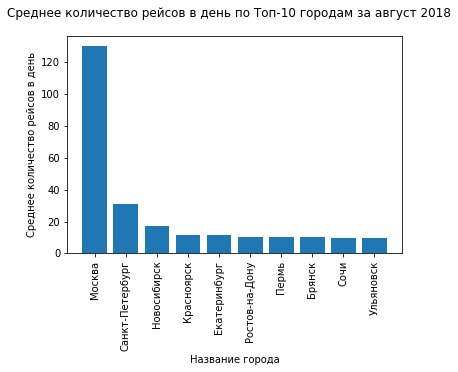

In [8]:
# Построим столбчатую диаграмму распределения Топ-10 городов и среднего количества рейсов по убыванию:

plt.bar(top10_cities['city'], top10_cities['average_flights'])
plt.suptitle('Среднее количество рейсов в день по Топ-10 городам за август 2018')
plt.xlabel('Название города')
plt.ylabel('Среднее количество рейсов в день')
plt.xticks(rotation=90);

На графике Топ-10 городов, помимо Москвы, можно выделить Санкт-Петербург (среднее количество рейсов - 31.16) и Новосибирск (среднее количество рейсов - 17.32). 
- Санкт-Петербург является вторым по населению городом России и также как и Москва - городом федерального значения. Среднее количество рейсов в Санкт-Петербург также велико по сравнению с остальными городами. Через Санкт-Петербург также осуществялется много пересадочных рейсов, в том числе за границу.
- Новосибирск - третий город России по населению. Аэропорт Новосибирска крупнейший по пассажиропотоку в азиатской части России, используется как пересадочный узел некоторыми Авиакомпаниями. 

В остальных городах среднее количество рейсов в день меньше - для Красноярска 11.58, и далее плавно уменьшается во оставшимся городам.

На основании графиков (по общему количеству городов и Топ-10) можно сделать вывод, что среднее количество рейсов в день зависит от размера города и является ли он пересадочным узлом.